#CDIA:::AAI - Hill Climbing Algorithm -- Travelling Salesman Problem

Ibai Laña

In this notebook we will encode TSP problem and try to solve it with HIll Climbing Algorithm.



## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for TSP problem. We will start with a problem for which we know the solution
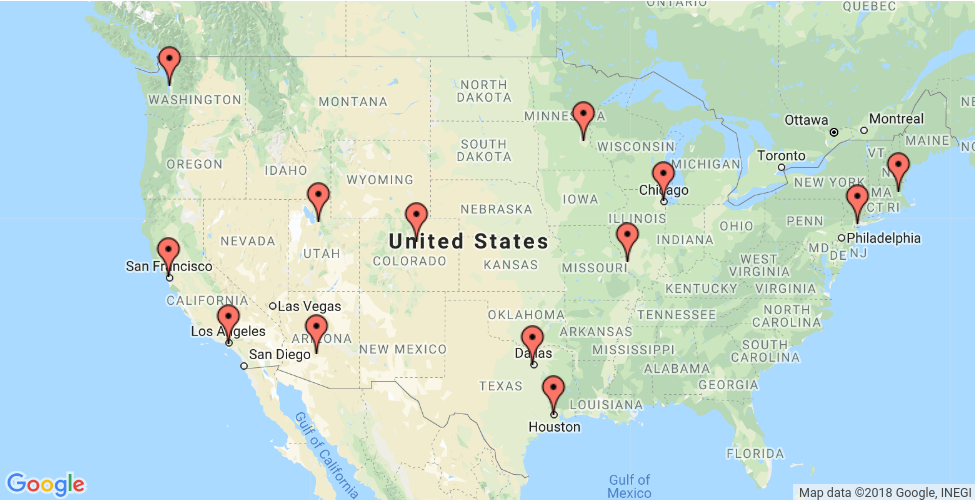

The known shortest route for this version of the problem that tries to connect 13 cities 
(0. New York - 1. Los Angeles - 2. Chicago - 3. Minneapolis - 4. Denver - 5. Dallas - 6. Seattle - 7. Boston - 8. San Francisco - 9. St. Louis - 10. Houston - 11. Phoenix - 12. Salt Lake City)

is 7293 miles, connecting:
0 - 7 - 2 - 3 - 4 - 12 - 6 - 8 - 1 - 11 - 10 - 5 - 9 -0

In [1]:
import numpy as np
class TSP (): 
    #attributes of the class are empty
    name = ""
    initial_state = []
    actions = []
    number_of_cities = 0
    successors = []
    distance_matrix = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]

    def __init__(self): ## init method is the constructor. 
        self.name ="TSP"
        self.number_of_cities = 13
        
        # to formulate the problem we will state that there will be a set of 
        # n queens in n columns. Each queen will be placed in a column, so we
        # only need to state which row they are in, in an 8-sized array
        random_init =list(np.arange(self.number_of_cities))
        np.random.shuffle(random_init)
        self.initial_state = random_init
        #self.distance_matrix = self.initialize_distance_matrix()
        
    def initialize_distance_matrix(self):
      mat = np.zeros((self.number_of_cities, self.number_of_cities))
      for i in range(self.number_of_cities):
        for j in range(self.number_of_cities):
          if i!=j:
            if mat[i,j]==0:
              mat[i,j]= np.random.randint(10, 1000)
              mat[j,i] = mat[i,j]
      return mat



    def draw(self, state):
      text = ""
      for i in range(self.number_of_cities-1):
        text+="|"+str(state[i])+"|--"+str( self.distance_matrix [state[i]][state[i+1]])+"--"
      text+="|"+str(state[0])+"| ::::: "+str(self.get_evaluation(state))  
      print (text)

    def get_successors(self, state):
      successors = []
      for i in range( self.number_of_cities-1):
        new_successor = state.copy()
        new_successor[i], new_successor[i+1] = new_successor[i+1], new_successor[i]
        successors.append(new_successor)
      return successors

    def get_cost(self, action, state):
        # in this case the cost is constant, every action is the same, but this can change depending on the problem
        return 1

    # h(n) =  number of queens attacked     
    def get_evaluation (self, state):
      total_distance=0
      for i in range(self.number_of_cities-1):
        total_distance+=self.distance_matrix [state[i]][state[i+1]]
      total_distance+=self.distance_matrix[state[-1]][state[0]]#add the connection from last city to first
      
      return total_distance


In [2]:
import random
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))


for s in tsp.get_successors(tsp.initial_state):
  print (tsp.get_evaluation(s))


[10, 7, 9, 5, 6, 8, 0, 1, 3, 11, 2, 12, 4]
[[0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972], [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579], [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260], [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987], [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371], [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999], [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701], [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099], [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600], [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162], [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200], [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504], [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0]]
17338
[[7, 10, 9, 5, 6,

# Expansion Function



In [ ]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):
    successors = problem.get_successors(node["state"])
    #1.
    best_successor = successors[0]
    2.  
    for successor in successors:
      2.1
      if problem.get_evaluation(successor)<problem.get_evaluation(best_successor):
        best_successor=successor
    
    new_node = {}
    new_node["state"]=best_successor
    new_node["parent_node"]=node
    # we dont store the list of actions, cost or depth
    # new_node["actions"]=node["actions"] + [action]
    # new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
    # new_node["depth"]=node["depth"]+1
    new_node["evaluation"]=problem.get_evaluation(best_successor)
    # we only return a node, the next to be explored
    return new_node
    

# HILL CLIMBING METHOD


In [ ]:
def HillClimbing(problem):
  #1.
  initial_node = {}
  initial_node["state"]=problem.initial_state
  initial_node["parent_node"]=None
  initial_node["evaluation"]=problem.get_evaluation(problem.initial_state) 
  
  #2.
  current_node =initial_node
  
  
  local_best_found = False

  iteration = 1
  #3.
  while not local_best_found:
    
    ## just prints
    print ("***************************************")
    print ("ITERATION: ", iteration)
    problem.draw(current_node["state"])
    print ("Heuristic of the current node: ", problem.get_evaluation(current_node["state"]))
    ##
    
    # 3.1.
    best_successor = expand(current_node, problem)
      # if current is better than the best one, we are at a local minimum
    #3.2
    if problem.get_evaluation(current_node["state"])<= problem.get_evaluation(best_successor["state"]):
      local_best_found=True
      print ("Local minimum found, best_successor heuristic is : ", problem.get_evaluation(best_successor["state"]))
      print ("BEst node with evaluation h(n)=", problem.get_evaluation(current_node["state"]))
      problem.draw(current_node["state"])
    #3.3.
    else:
      current_node = best_successor



    
    iteration+=1
  return current_node





In [ ]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))

solution  = HillClimbing(tsp)

# SIMULATED ANNEALING



## temperature functions

we create some temperature functions.

which of them will perform better?

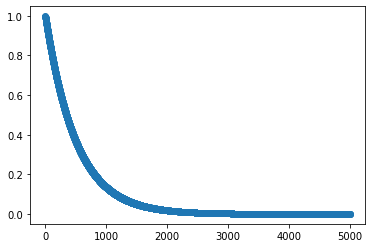

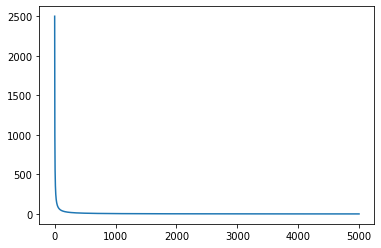

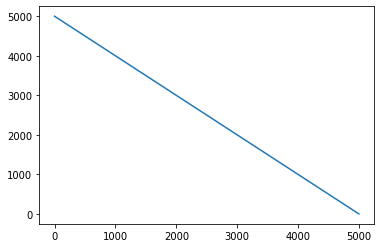

In [3]:
import matplotlib.pyplot as plt
def geometric_t(initial_t, iteration):
  return initial_t/float(iteration+1)

def exponential (iteration, initial_t):
  return np.exp(-iteration/(initial_t/10.))

def linear_t(t, its, i):
  return t-(t*i/its)


its = 5000
t = 5000

geom = []
lin = []
exp = []
for i in range(1, its):
  exp.append(exponential (i, t))
  geom.append (geometric_t(t,i))
  lin.append(linear_t(t,its, i))


plt.plot(exp)
plt.scatter(np.arange(len(exp)), exp)
plt.figure()
plt.plot(geom)

plt.figure()
plt.plot(lin)






```
Make the initialNode with the initial problem state
currentNode = initialNode
i = 1
T = temperatureFunction(i)
WHILE T != 0 AND i < MAX_VALUE DO
  successors = EXPAND currentNode’s state
  nextNode = randomly selected successor among Successors
  ΔE = f(currentNode) - f(nextNode) (minimization problem)
  IF ΔE > 0 THEN
    CurrentNode = NextNode
  ELSE
    currentNode = NextNode only with probability eΔE/T
  T = temperatureFunction(++i)
RETURN currentNode’s state

```


In [5]:
import random
def SimulatedAnnealing(problem, iterations):
  #1.
  
  current_node =problem.initial_state
  T = iterations
  i = 1
  
  
  while T != 0 and i < iterations:
    print ("***************************************")
    print ("ITERATION: ", i)
    problem.draw(current_node)
    print ("Heuristic of the current node: ", problem.get_evaluation(current_node))

    successors = problem.get_successors(current_node)
    next_node = random.choice(successors)
    delta_energy = problem.get_evaluation(current_node) - problem.get_evaluation(next_node)
    if delta_energy>0:
     #if the delta is positive, it means next_node is smaller, then better for an optimization problem
      current_node= next_node
    else:
      acceptance_probability = np.exp(delta_energy/  linear_t(T, iterations, i))
      if np.random.rand()<acceptance_probability:
         current_node=next_node       
    i+=1
  return current_node

In [8]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))

solution  = SimulatedAnnealing(tsp, 100)



[3, 4, 7, 0, 5, 10, 12, 2, 1, 11, 9, 8, 6]
[[0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972], [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579], [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260], [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987], [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371], [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999], [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701], [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099], [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600], [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162], [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200], [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504], [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0]]
13932
[[4, 3, 7, 0, 5, 